In [1]:
from transformers import pipeline
import requests
import numpy as np
import os
from PIL import Image, ImageDraw

In [2]:
#check_point="./detr-resnet-50_finetuned_zasou"
check_point="tosa-no-onchan/detr-resnet-50_finetuned_zasou"
#check_point="./detr-resnet-50_finetuned_zasou-300+100epoch"
obj_detector = pipeline("object-detection", model=check_point, device=0)

In [3]:
path='./datasets/train/zasou'
flist=os.listdir(path)
cnt=0

In [31]:
#url = "https://i.imgur.com/2lnWoly.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
#image = Image.open('./datasets/train/zasou/11.jpeg')
image = Image.open(path+'/'+flist[cnt])
cnt+=1
#image

In [32]:
results = obj_detector(image)
results

[{'score': 0.9084017872810364,
  'label': 'zasou',
  'box': {'xmin': 105, 'ymin': 99, 'xmax': 1810, 'ymax': 1412}}]

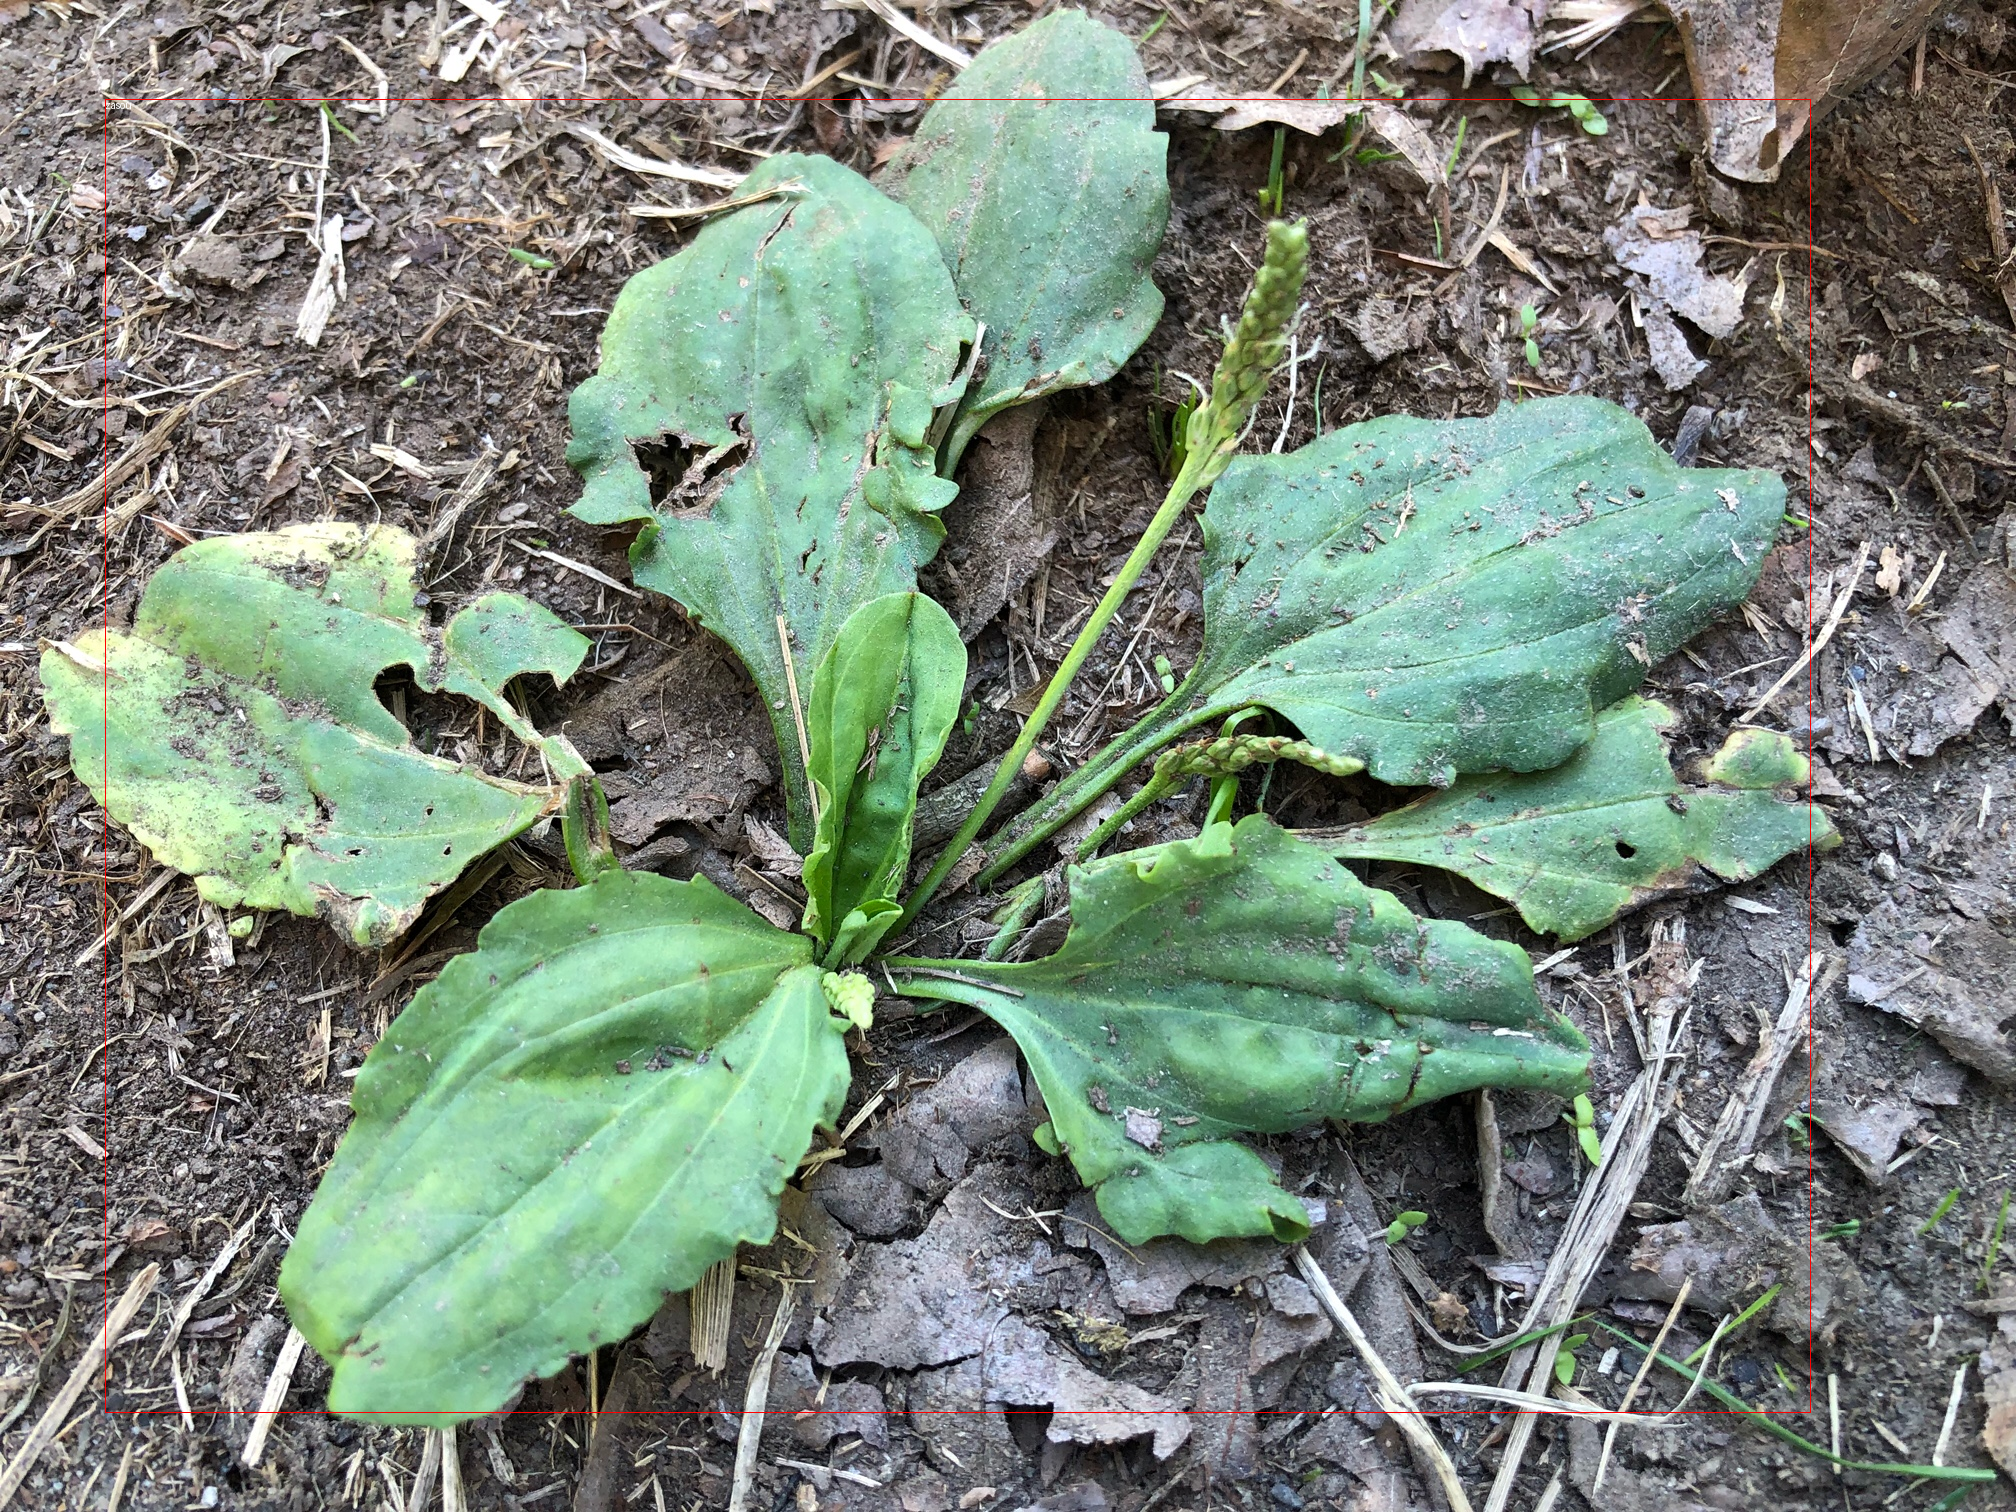

In [33]:
draw = ImageDraw.Draw(image)
for i in range(len(results)):
    score = results[i]['score']
    label = results[i]['label']
    box=results[i]['box']
    (x,y,x2,y2) =box.values()
    draw.rectangle((x, y, x2, y2), outline="red", width=1)
    draw.text((x, y), label, fill="white")
image

In [ ]:
if False:
    from transformers import AutoImageProcessor
    from transformers import AutoModelForObjectDetection
    import torch
    image_processor = AutoImageProcessor.from_pretrained(check_point)
    model = AutoModelForObjectDetection.from_pretrained(check_point)
    with torch.no_grad():
        inputs = image_processor(images=image, return_tensors="pt")
        outputs = model(**inputs)
        target_sizes = torch.tensor([image.size[::-1]])
        results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]
    
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
        )


In [ ]:
if False:
    draw = ImageDraw.Draw(image)
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        x, y, x2, y2 = tuple(box)
        draw.rectangle((x, y, x2, y2), outline="red", width=1)
        draw.text((x, y), model.config.id2label[label.item()], fill="white")
    
    image